# A Complete Project Example

In [3]:
from sklearn import metrics
import matplotlib.pyplot as plt

def performance_evaluation_report(model, X_test, y_test, show_plot=False, labels=None, show_pr_curve=False):
    '''
    Function for creating a performance report of a classification model.
    
    Parameters
    ----------
    model : scikit-learn estimator
        A fitted estimator for classification problems.
    X_test : pd.DataFrame
        DataFrame with features matching y_test
    y_test : array/pd.Series
        Target of a classification problem.
    show_plot : bool
        Flag whether to show the plot
    labels : list
        List with the class names.
    show_pr_curve : bool
        Flag whether to also show the PR-curve. For this to take effect, 
        show_plot must be True.
        
    Return
    ------
    stats : pd.Series
        A series with the most important evaluation metrics
    '''

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    cm = metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)

    precision, recall, thresholds = metrics.precision_recall_curve(
        y_test, y_pred_prob)
    pr_auc = metrics.auc(recall, precision)

    #
    # calculate the g-mean for each threshold
    #
    gmeans = np.sqrt(tpr * (1-fpr))
    #
    # locate the index of the largest g-mean
    #
    ix = np.argmax(gmeans)
    
    if show_plot:

        if labels is None:
            labels = ['Negative', 'Positive']

        N_SUBPLOTS = 3 if show_pr_curve else 2
        PLOT_WIDTH = 15 if show_pr_curve else 12
        PLOT_HEIGHT = 5 if show_pr_curve else 6

        fig, ax = plt.subplots(
            1, N_SUBPLOTS, figsize=(PLOT_WIDTH, PLOT_HEIGHT))
        fig.suptitle('Performance Evaluation', fontsize=16)

        sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='BuGn_r', square=True, cbar=False, ax=ax[0],
                    annot_kws={"ha": 'center', "va": 'center'})
        ax[0].set(xlabel='Predicted label',
                  ylabel='Actual label', title='Confusion Matrix')
        ax[0].xaxis.set_ticklabels(labels)
        ax[0].yaxis.set_ticklabels(labels)

        ax[1].plot(fpr, tpr, 'b-', label=f'ROC-AUC = {roc_auc:.2f}')
        ax[1].set(xlabel='False Positive Rate',
                  ylabel='True Positive Rate', title='ROC Curve')
        
        #ax[1].plot(fp/(fp+tn), tp/(tp+fn), 'ro',
        #           markersize=8, label='Decision Point')
        
        ax[1].plot(fpr[ix], tpr[ix], 'ro',
                   markersize=8, label='Decision Point')
        
        ax[1].plot([0, 1], [0, 1], 'r--')
        ax[1].legend(loc='lower right')

        if show_pr_curve:

            ax[2].plot(recall, precision, label=f'PR-AUC = {pr_auc:.2f}')
            ax[2].set(xlabel='Recall', ylabel='Precision',
                      title='Precision-Recall Curve')
            ax[2].legend()
            
        plt.show()
#         print('#######################')
#         print('Evaluation metrics ####')
#         print('#######################')
#         print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred):.4f}')
#         print(f'Precision: {metrics.precision_score(y_test, y_pred):.4f}')
#         print(f'Recall (Sensitivity): {metrics.recall_score(y_test, y_pred):.4f}')
#         print(f'Specificity: {(tn / (tn + fp)):.4f}')
#         print(f'F1-Score: {metrics.f1_score(y_test, y_pred):.4f}')
#         print(f"Cohen's Kappa: {metrics.cohen_kappa_score(y_test, y_pred):.4f}")
        fig, ax = plt.subplots(1,1, figsize=(10,5))
        uno_distr = y_pred_prob[y_test==1]
        zero_distr = y_pred_prob[y_test==0]
        ax.hist(uno_distr, color="red", label = "score(z|y=1)", density=True, alpha=0.5, bins=50)
        ax.hist(zero_distr, color="blue", label = "score(z|y=0)", density=True, alpha=0.5, bins=50)
        ax.set_xlabel("score", fontsize=12)
        ax.set_xlabel("distribution", fontsize=12)
        plt.show()
        

    stats = {'accuracy': metrics.accuracy_score(y_test, y_pred),
             'precision': metrics.precision_score(y_test, y_pred),
             'recall': metrics.recall_score(y_test, y_pred),
             'specificity': (tn / (tn + fp)),
             'f1_score': metrics.f1_score(y_test, y_pred),
             'cohens_kappa': metrics.cohen_kappa_score(y_test, y_pred),
             'roc_auc': roc_auc,
             'pr_auc': pr_auc}

    return stats

## Let's make a simple project from scratch ...

### Credit Card Default Dataset

In this chapter, we tackle a binary classification problem set in the financial industry. We
work with a dataset contributed to the UCI Machine Learning Repository (a very popular
data repository). The dataset used in this chapter was collected in a Taiwanese bank in October 2005. The
study was motivated by the fact that—at that time—more and more banks were giving cash
(and credit card) credit to willing customers. You can download the sample file [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

In [4]:
import pandas as pd

In [5]:
path = './data/'

In [6]:
column_dtypes = {'EDUCATION': 'category',
'MARRIAGE': 'category',
'SEX': 'category',
'PAYMENT_STATUS_SEP': 'category',
'PAYMENT_STATUS_AUG': 'category',
'PAYMENT_STATUS_JUL': 'category',
'PAYMENT_STATUS_JUN': 'category',
'PAYMENT_STATUS_MAY': 'category',
'PAYMENT_STATUS_APR': 'category'}

In [7]:
#df = pd.read_csv(path + 'credit_card_default.csv', index_col=0, na_values='')

In [8]:
df = pd.read_csv(path + 'credit_card_default.csv', index_col=0, na_values='', dtype=column_dtypes, sep=',')

In [9]:
df.head()

,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,...,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr,default_payment_next_month
0,20000,Female,University,Married,24.0,Payment delayed 2 months,Payment delayed 2 months,Payed duly,Payed duly,Unknown,...,0,0,0,0,689,0,0,0,0,1
1,120000,Female,University,Single,26.0,Payed duly,Payment delayed 2 months,Unknown,Unknown,Unknown,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,University,Single,34.0,Unknown,Unknown,Unknown,Unknown,Unknown,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,Female,University,Married,37.0,Unknown,Unknown,Unknown,Unknown,Unknown,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,Male,University,Married,57.0,Payed duly,Unknown,Payed duly,Unknown,Unknown,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In this step, we separated the **features** from the
**target (label)** by using the pop method. It assigned the given column to the new variable, while
removing it from the source DataFrame.

In [10]:
X = df.copy()
y = X.pop('default_payment_next_month')

In the following, we provide a simplified description of the variables:

- limit_bal: The amount of the given credit (NT dollar)
- sex: Gender
- education: Level of education
- marriage: Marital status
- age: Age of the customer
- payment_status_{month}: Status of payments in one of the previous 6 months
- bill_statement_{month}: The amount of bill statements (NT dollars) in one of the previous 6 months
- previous_payment_{month}: The amount of previous payments (NT dollars) in one of the previous 6 months

The target variable indicates **whether the customer defaulted on the payment in the
following month**.

### Exploratory Data Analysis

In [11]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
limit_bal,30000.0,167484.32,129747.66,10000.0,50000.00,140000.0,240000.00,1000000.0
age,29850.0,35.49,9.22,21.0,28.00,34.0,41.00,79.0
bill_statement_sep,30000.0,51223.33,73635.86,-165580.0,3558.75,22381.5,67091.00,964511.0
bill_statement_aug,30000.0,49179.08,71173.77,-69777.0,2984.75,21200.0,64006.25,983931.0
bill_statement_jul,30000.0,47013.15,69349.39,-157264.0,2666.25,20088.5,60164.75,1664089.0
bill_statement_jun,30000.0,43262.95,64332.86,-170000.0,2326.75,19052.0,54506.00,891586.0
bill_statement_may,30000.0,40311.40,60797.16,-81334.0,1763.00,18104.5,50190.50,927171.0
bill_statement_apr,30000.0,38871.76,59554.11,-339603.0,1256.00,17071.0,49198.25,961664.0
previous_payment_sep,30000.0,5663.58,16563.28,0.0,1000.00,2100.0,5006.00,873552.0
previous_payment_aug,30000.0,5921.16,23040.87,0.0,833.00,2009.0,5000.00,1684259.0


Plot the distribution of age and, additionally, split it by gender:

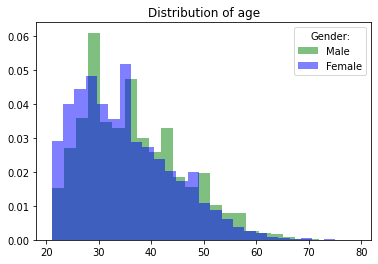

In [12]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import numpy as np
#
# subplots return a figure and an array of axes. The Figure is the top level container for 
# all the plot elements while the axes class contains most of the figure elements: Axis, 
# Tick, Line2D, Text, Polygon, etc., and sets the coordinate system.
#
fig, ax = plt.subplots()

ax.hist(df.loc[df.sex=='Male', 'age'].dropna(),
    density = True, color='green', label = "Male", bins=25, alpha = 0.5)


ax.hist(df.loc[df.sex=='Female', 'age'].dropna(),
    density = True, color='blue', label = "Female", bins=25, alpha = 0.5)

ax.set_title('Distribution of age')
ax.legend(title='Gender:')
plt.show()

In [13]:
pivot = df.groupby("education")['default_payment_next_month']
pivot = pivot.value_counts(normalize=True).unstack()
pivot

default_payment_next_month,0,1
education,,
Graduate school,0.808200,0.191800
High school,0.748874,0.251126
Others,0.929336,0.070664
University,0.762321,0.237679


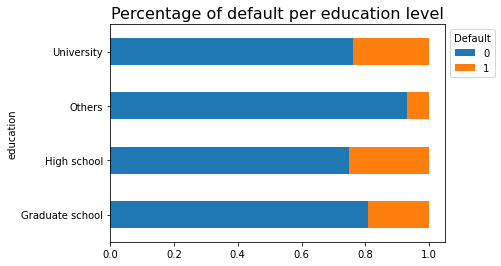

In [14]:
ax = pivot.plot(kind='barh', stacked='True')

ax.set_title('Percentage of default per education level', fontsize=16)
ax.legend(title='Default', bbox_to_anchor=(1,1))

### Splitting Data into Training and Test Sets

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

### Dealing with Missing Values

In [16]:
# !pip install missingno
# !conda install missingno
import missingno
from sklearn.impute import SimpleImputer

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   limit_bal             30000 non-null  int64  
 1   sex                   29850 non-null  object 
 2   education             29850 non-null  object 
 3   marriage              29850 non-null  object 
 4   age                   29850 non-null  float64
 5   payment_status_sep    30000 non-null  object 
 6   payment_status_aug    30000 non-null  object 
 7   payment_status_jul    30000 non-null  object 
 8   payment_status_jun    30000 non-null  object 
 9   payment_status_may    30000 non-null  object 
 10  payment_status_apr    30000 non-null  object 
 11  bill_statement_sep    30000 non-null  int64  
 12  bill_statement_aug    30000 non-null  int64  
 13  bill_statement_jul    30000 non-null  int64  
 14  bill_statement_jun    30000 non-null  int64  
 15  bill_statement_may 

In [17]:
X.isna().sum()

limit_bal                 0
sex                     150
education               150
marriage                150
age                     150
payment_status_sep        0
payment_status_aug        0
payment_status_jul        0
payment_status_jun        0
payment_status_may        0
payment_status_apr        0
bill_statement_sep        0
bill_statement_aug        0
bill_statement_jul        0
bill_statement_jun        0
bill_statement_may        0
bill_statement_apr        0
previous_payment_sep      0
previous_payment_aug      0
previous_payment_jul      0
previous_payment_jun      0
previous_payment_may      0
previous_payment_apr      0
dtype: int64

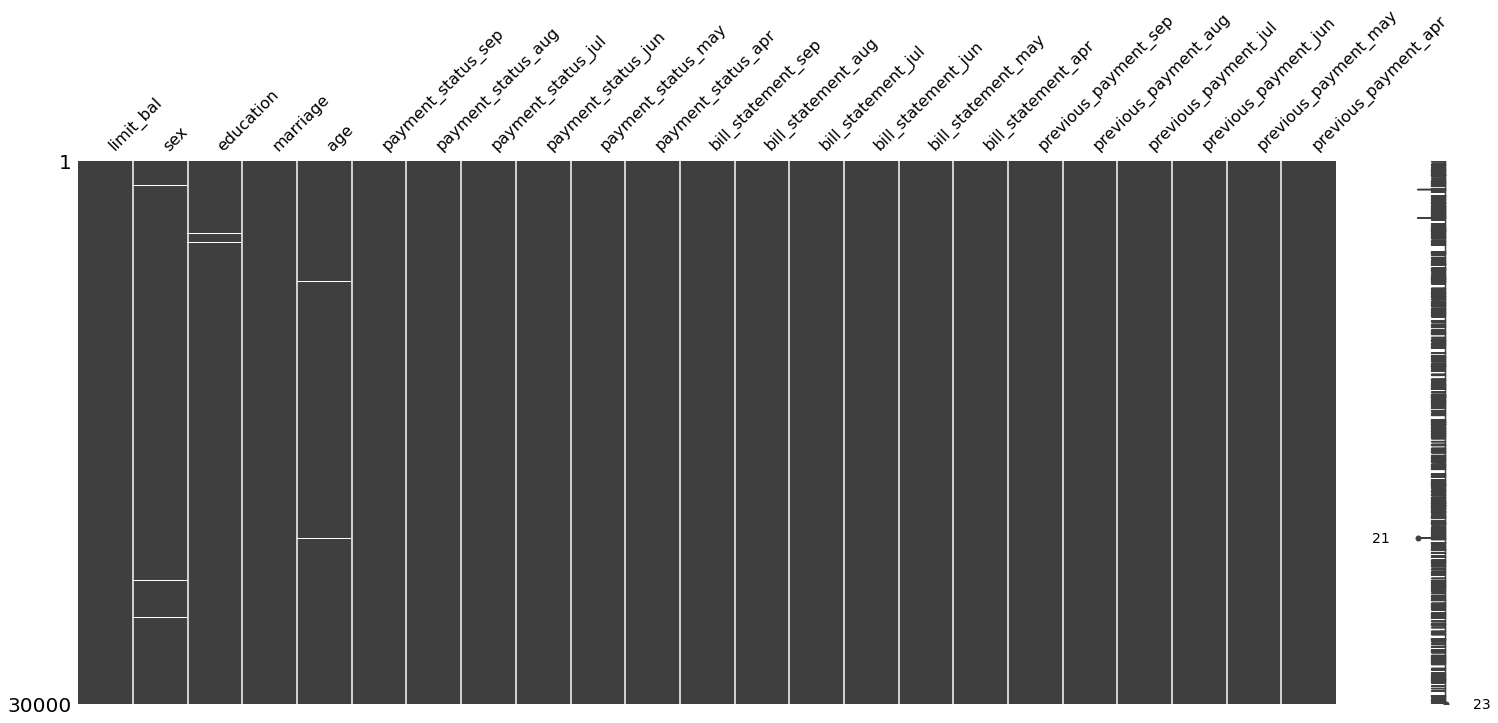

In [18]:
missingno.matrix(X)
plt.show()

In [19]:
NUM_FEATURES = ['age']
CAT_FEATURES = ['sex', 'education', 'marriage']

In [20]:
for col in NUM_FEATURES:
    num_imputer = SimpleImputer(strategy='median')
    num_imputer.fit(X_train[[col]])
    X_train.loc[:, col] = num_imputer.transform(X_train[[col]])
    X_test.loc[:, col] = num_imputer.transform(X_test[[col]])

In [21]:
for col in CAT_FEATURES:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer.fit(X_train[[col]])
    X_train.loc[:, col] = cat_imputer.transform(X_train[[col]])
    X_test.loc[:, col] = cat_imputer.transform(X_test[[col]])

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 21753 to 23654
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   limit_bal             24000 non-null  int64  
 1   sex                   24000 non-null  object 
 2   education             24000 non-null  object 
 3   marriage              24000 non-null  object 
 4   age                   24000 non-null  float64
 5   payment_status_sep    24000 non-null  object 
 6   payment_status_aug    24000 non-null  object 
 7   payment_status_jul    24000 non-null  object 
 8   payment_status_jun    24000 non-null  object 
 9   payment_status_may    24000 non-null  object 
 10  payment_status_apr    24000 non-null  object 
 11  bill_statement_sep    24000 non-null  int64  
 12  bill_statement_aug    24000 non-null  int64  
 13  bill_statement_jul    24000 non-null  int64  
 14  bill_statement_jun    24000 non-null  int64  
 15  bill_statement_

<AxesSubplot:>

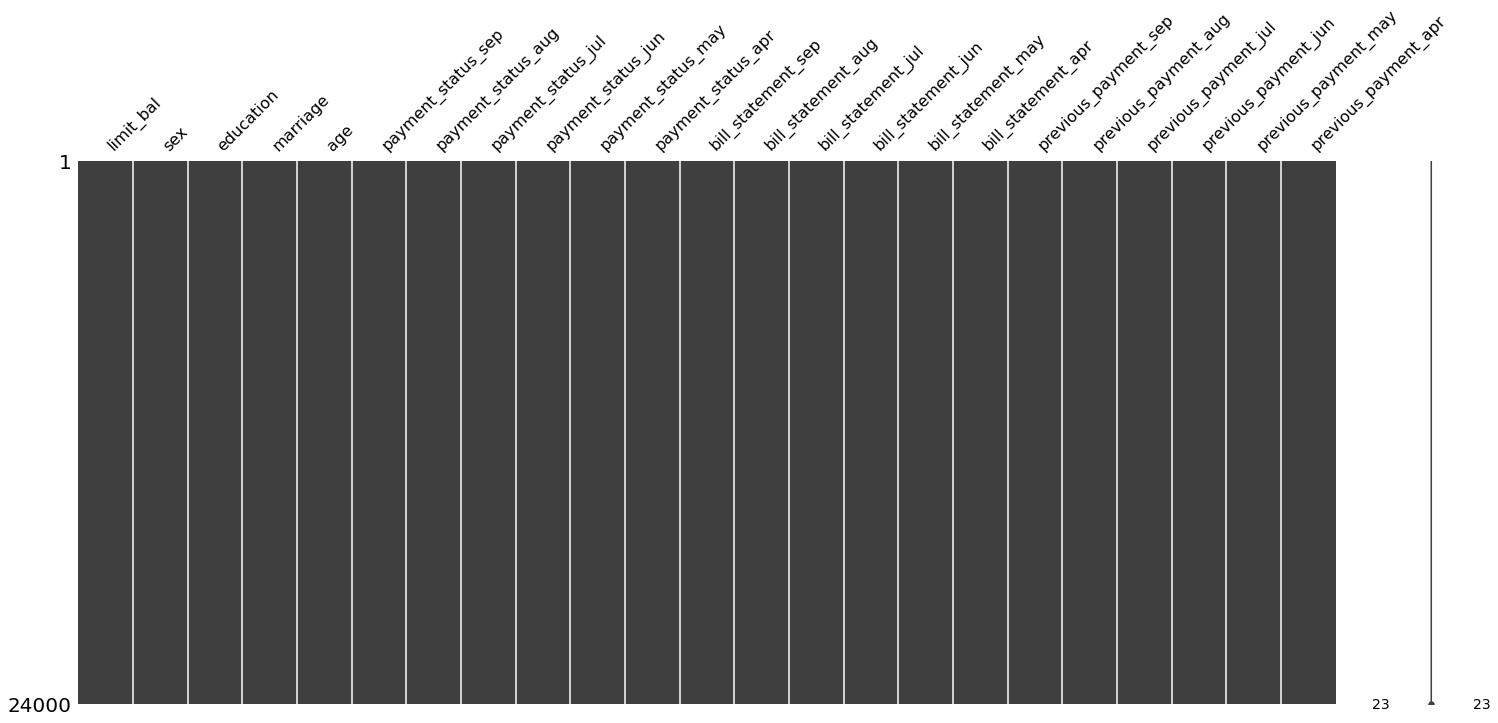

In [23]:
missingno.matrix(X_train)

### Encoding categorical variables

As we have already said, most machine learning algorithms work exclusively with numeric data. That is why we need to encode categorical features into a representation compatible with the models.

In this example, we cover some popular encoding approaches:

- Label encoding
- One-hot encoding

In label encoding, we replace the categorical value with a numeric value between $0$ and $(NrClasses - 1)$, for example, with three distinct classes, we use {0, 1, 2}. Let's how encode a categorical variable:

>**Preprocessing : sklearn.preprocessing**
>
>Before starting to train our machine learning models and make predictions, we usually need to do some preprocessing on our raw data. Among some commonly used preprocessing tasks come OneHotEncoder, StandardScaler, MinMaxScaler, etc. These are respectively for encoding of the categorical features into a one-hot numeric array, standardization of the features and scaling each feature to a given range. Many other preprocessing methods are built-in this module.

>**ColumnTransformer : sklearn.compose**
>
>The ColumnTransformer is a class in the scikit-learn Python machine learning library that allows you to selectively apply data preparation transforms. For example, it allows you to apply a specific transform or sequence of transforms to just the numerical columns, and a separate sequence of transforms to just the categorical columns.

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

**Label Encoding**

In [25]:
COL = 'education'
#
# We created a copy of X_train and X_test, just to show how to work with LabelEncoder, but we do not 
# want to modify the DataFrames.
#
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

label_enc = LabelEncoder()
label_enc.fit(X_train_copy[COL])
X_train_copy.loc[:, COL] = label_enc.transform(X_train_copy[COL])
X_test_copy.loc[:, COL] = label_enc.transform(X_test_copy[COL])

In [26]:
X_train[COL]

21753         University
251           University
22941             Others
618      Graduate school
17090         University
              ...       
29802         University
5390     Graduate school
860      Graduate school
15795         University
23654         University
Name: education, Length: 24000, dtype: object

In [27]:
X_train[COL].unique()

array(['University', 'Others', 'Graduate school', 'High school'],
      dtype=object)

In [28]:
X_train_copy[COL]

21753    3
251      3
22941    2
618      0
17090    3
        ..
29802    3
5390     0
860      0
15795    3
23654    3
Name: education, Length: 24000, dtype: int32

In [29]:
X_train_copy[COL].unique()

array([3, 2, 0, 1])

**One-hot Encoding**

In [30]:
#
# Select categorical features for one-hot encoding:
#
CAT_FEATURES = X_train.select_dtypes(include='object').columns.to_list()
CAT_FEATURES

['sex',
 'education',
 'marriage',
 'payment_status_sep',
 'payment_status_aug',
 'payment_status_jul',
 'payment_status_jun',
 'payment_status_may',
 'payment_status_apr']

In [31]:
#
#Instantiate the OneHotEncoder object:
#
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='error',drop='first')

In [32]:
#
# Create the column transformer using the one-hot encoder. To use the ColumnTransformer, you must specify a 
# list of transformers. Each transformer is a three-element tuple that defines the name of the transformer, 
# the transform to apply, and the column indices to apply it to. For example:
#
# (Name, Object, Columns)
#
one_hot_transformer = ColumnTransformer([("one_hot", one_hot_encoder, CAT_FEATURES)])

In [33]:
#
# Fit the transformer:
#
one_hot_transformer.fit(X_train)

ColumnTransformer(transformers=[('one_hot',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['sex', 'education', 'marriage',
                                  'payment_status_sep', 'payment_status_aug',
                                  'payment_status_jul', 'payment_status_jun',
                                  'payment_status_may',
                                  'payment_status_apr'])])

In [34]:
X_train['education'].unique()

array(['University', 'Others', 'Graduate school', 'High school'],
      dtype=object)

In [35]:
X_train['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [36]:
X_train['marriage'].unique()

array(['Single', 'Married', 'Others'], dtype=object)

In [38]:
#
# Apply the transformations to both the training and the test set:

col_names = one_hot_transformer.get_feature_names()

X_train_cat = pd.DataFrame(one_hot_transformer.transform(X_train),columns=col_names,index=X_train.index)
X_train_ohe = pd.concat([X_train, X_train_cat], axis=1) .drop(CAT_FEATURES, axis=1)

X_test_cat = pd.DataFrame(one_hot_transformer.transform(X_test),columns=col_names,index=X_test.index)
X_test_ohe = pd.concat([X_test, X_test_cat], axis=1) .drop(CAT_FEATURES, axis=1)

In [39]:
X_train_cat.head()

,one_hot__x0_Male,one_hot__x1_High school,one_hot__x1_Others,one_hot__x1_University,one_hot__x2_Others,one_hot__x2_Single,one_hot__x3_Payment delayed 1 month,one_hot__x3_Payment delayed 2 months,one_hot__x3_Payment delayed 3 months,one_hot__x3_Payment delayed 4 months,...,one_hot__x7_Payment delayed 8 months,one_hot__x7_Unknown,one_hot__x8_Payment delayed 2 months,one_hot__x8_Payment delayed 3 months,one_hot__x8_Payment delayed 4 months,one_hot__x8_Payment delayed 5 months,one_hot__x8_Payment delayed 6 months,one_hot__x8_Payment delayed 7 months,one_hot__x8_Payment delayed 8 months,one_hot__x8_Unknown
21753,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
251,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22941,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
618,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17090,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
X_train_ohe.head(n=15)

,limit_bal,age,bill_statement_sep,bill_statement_aug,bill_statement_jul,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,...,one_hot__x7_Payment delayed 8 months,one_hot__x7_Unknown,one_hot__x8_Payment delayed 2 months,one_hot__x8_Payment delayed 3 months,one_hot__x8_Payment delayed 4 months,one_hot__x8_Payment delayed 5 months,one_hot__x8_Payment delayed 6 months,one_hot__x8_Payment delayed 7 months,one_hot__x8_Payment delayed 8 months,one_hot__x8_Unknown
21753,80000,24.0,75125,77353,78321,73731,39643,39457,3503,5001,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
251,30000,28.0,29242,29507,29155,25255,22001,0,5006,1244,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22941,180000,44.0,20916,0,850,0,6881,10340,0,850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
618,60000,25.0,58839,53235,38533,39639,39619,39140,2018,1900,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17090,130000,25.0,111587,112348,114734,117823,120854,123904,4100,4200,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6362,20000,32.0,19844,19238,20205,19588,20037,19880,0,1302,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24680,100000,33.0,7067,-418,7064,15229,9689,2669,0,7482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28329,210000,31.0,205243,209502,203831,178410,130619,115700,7736,7100,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15874,50000,35.0,13517,14536,15694,16431,17056,17581,1550,1700,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22653,360000,43.0,4435,799,1071,15584,3195,4261,805,1071,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Fit a Decision Tree Classifier

In [38]:
#import graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from sklearn import metrics
from io import StringIO
import seaborn as sns
#from ipywidgets import Image
#import pydotplus

In [39]:
tree_classifier = DecisionTreeClassifier(max_depth=3)
tree_classifier.fit(X_train_ohe, y_train)
y_pred = tree_classifier.predict(X_test_ohe)

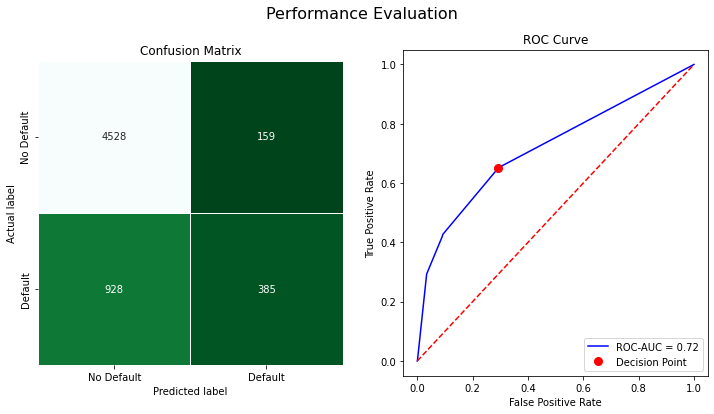

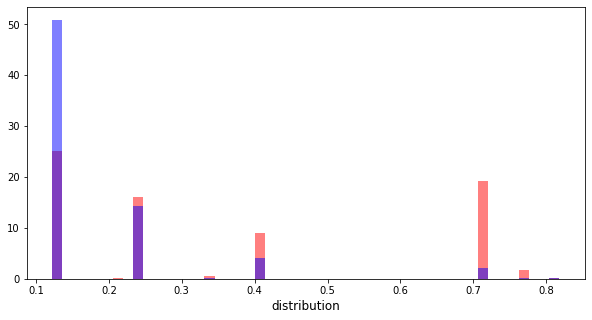

In [40]:
LABELS = ['No Default', 'Default']
tree_perf = performance_evaluation_report(tree_classifier,X_test_ohe,y_test, labels=LABELS,show_plot=True)

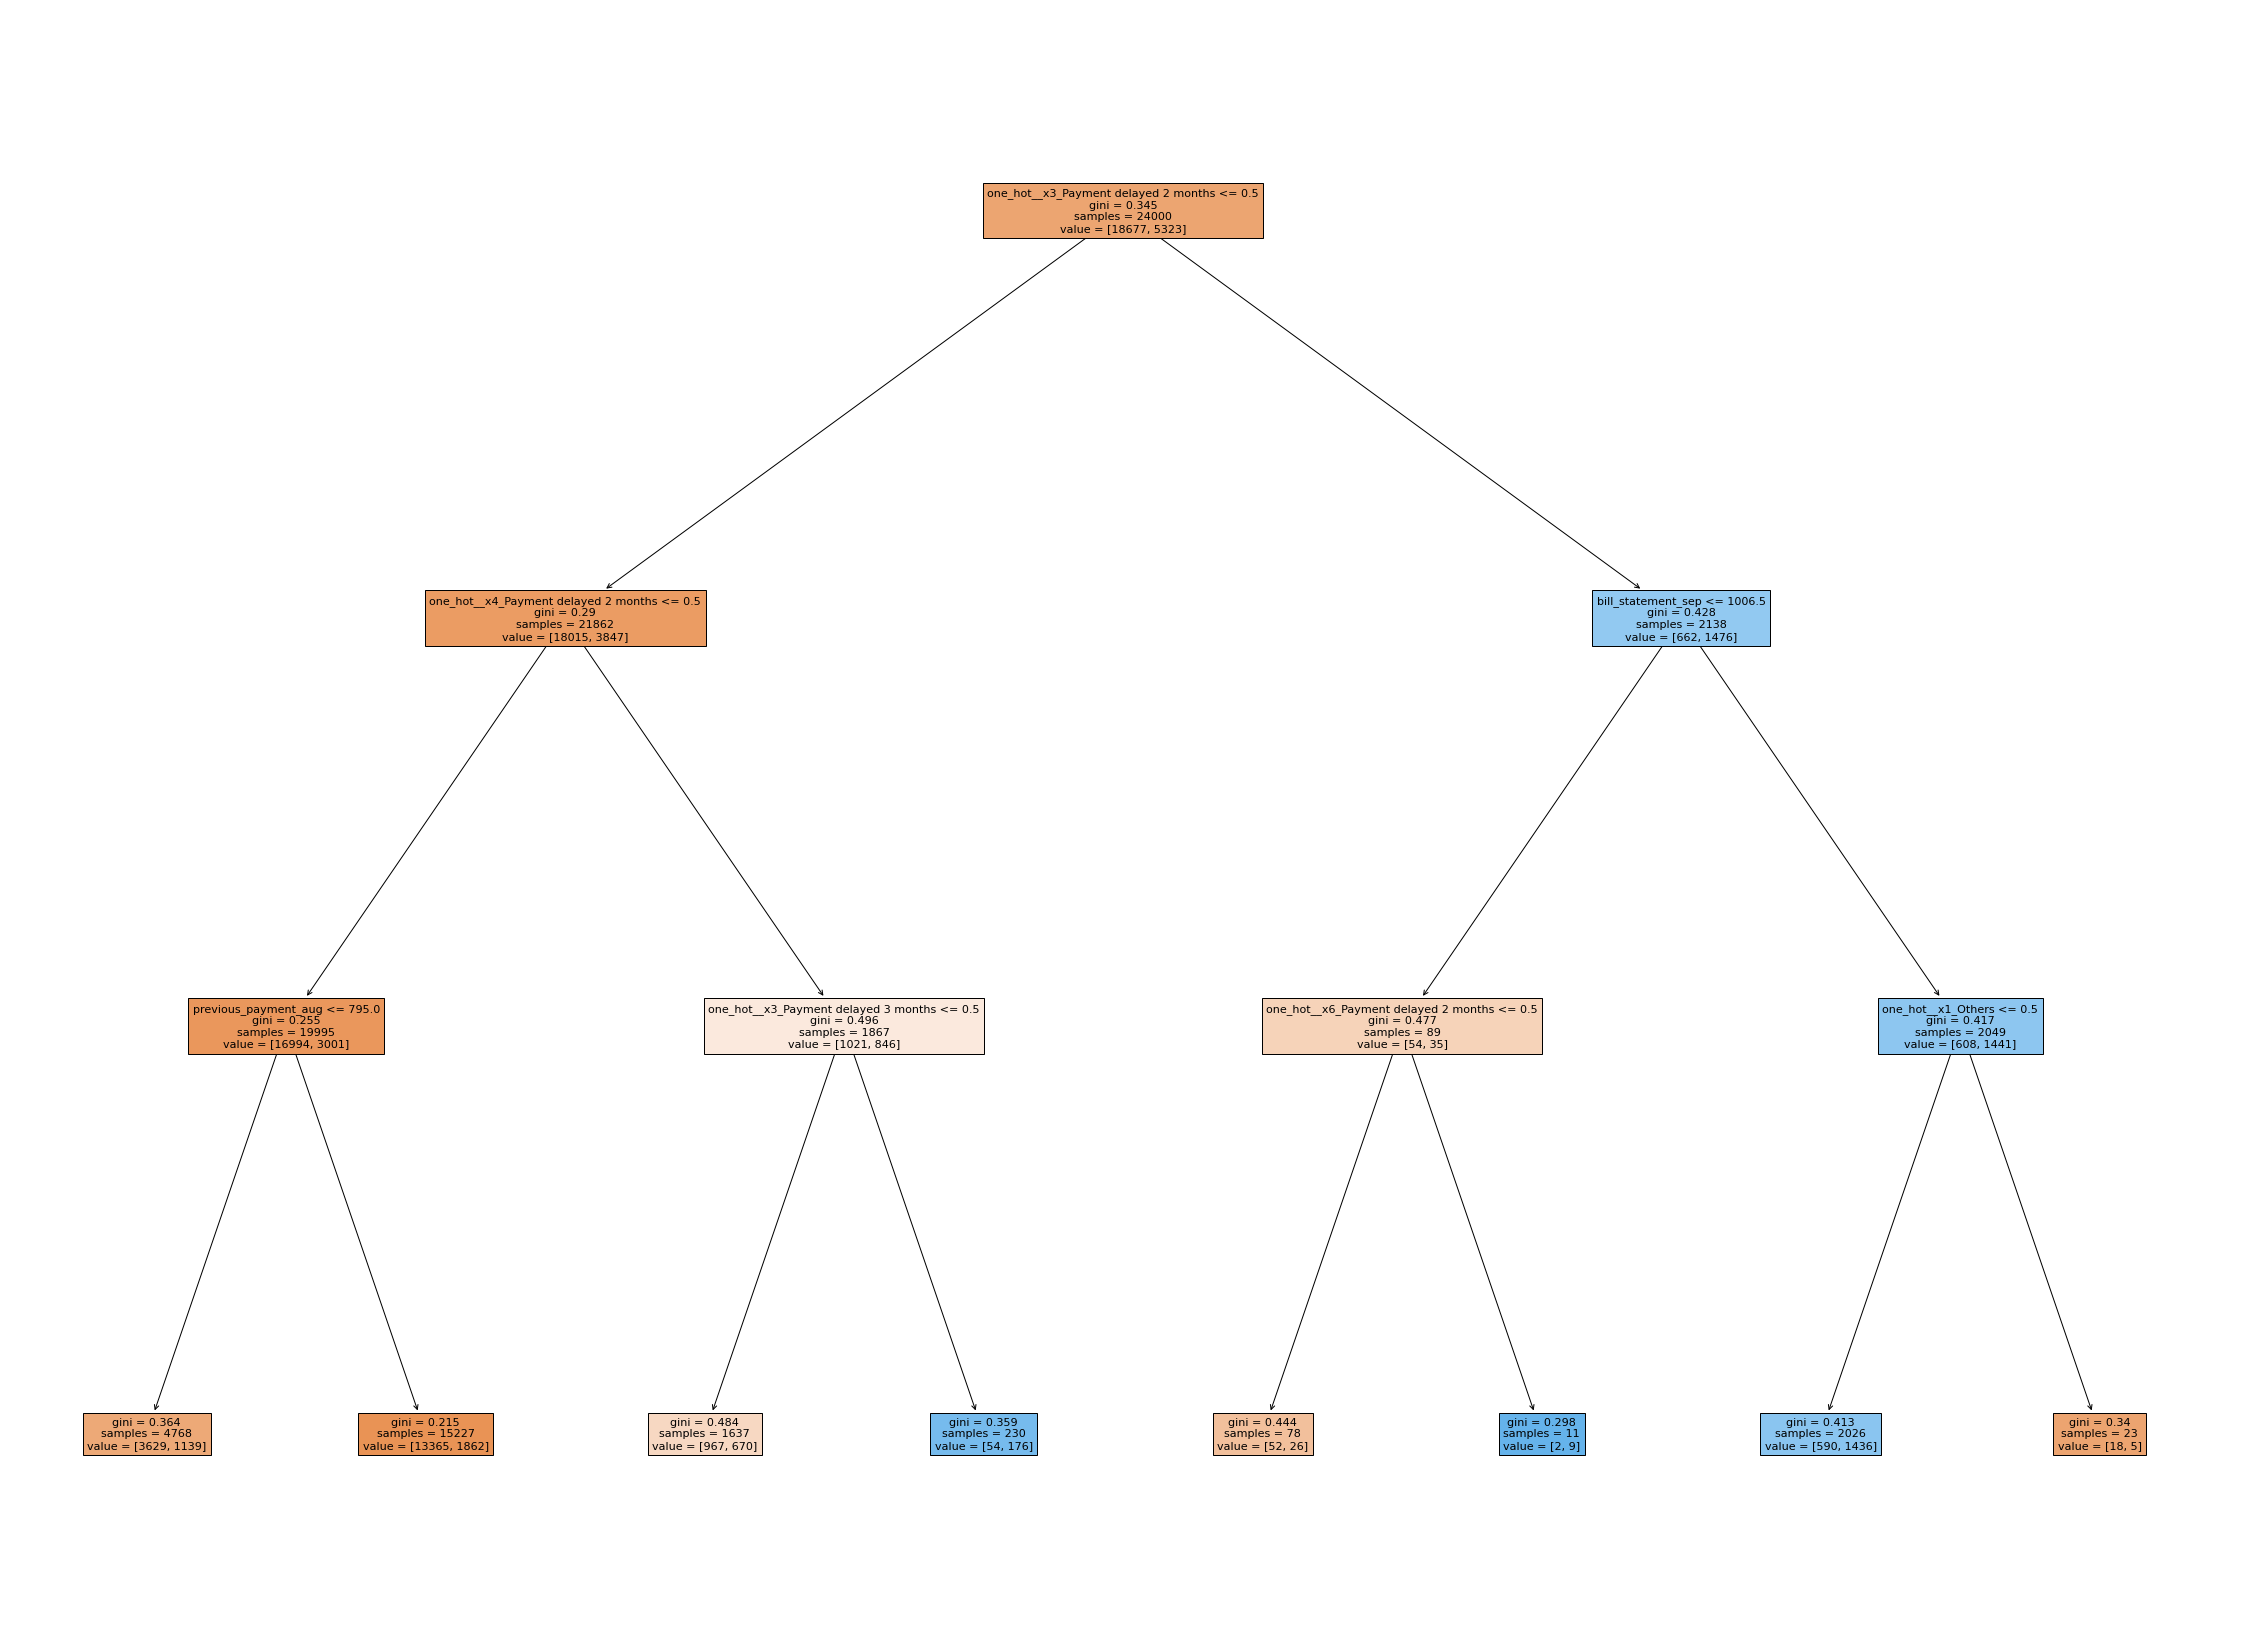

In [41]:
fig, ax = plt.subplots(figsize=(40, 30))
plot_tree(tree_classifier, filled=True, feature_names=X_train_ohe.columns, proportion=False)
plt.show()

## Tuning hyperparameters via grid search

In machine learning, we have two types of parameters: those that are learned
from the training data, for example, the weights in logistic regression, and the
parameters of a learning algorithm that are optimized separately. The latter are the
tuning parameters (or hyperparameters) of a model, for example, the regularization
parameter in logistic regression or the depth parameter of a decision tree.
In the previous section, we used validation curves to improve the performance of
a model by tuning one of its hyperparameters. In this section, we will take a look
at a popular hyperparameter optimization technique called grid search, which
can further help to improve the performance of a model by finding the optimal
combination of hyperparameter values.

In [42]:
from sklearn.model_selection import GridSearchCV

depth = [3,4,5,6,7,8]
param_grid =[{'max_depth':depth}]
    
gs = GridSearchCV(estimator=tree_classifier,
                  param_grid=param_grid,
                  scoring='accuracy', cv=10, refit=True,n_jobs=-1)      

In [43]:
gs = gs.fit(X_train_ohe, y_train)

In [44]:
print(gs.best_score_)

0.81875


In [45]:
print(gs.best_params_)

{'max_depth': 6}


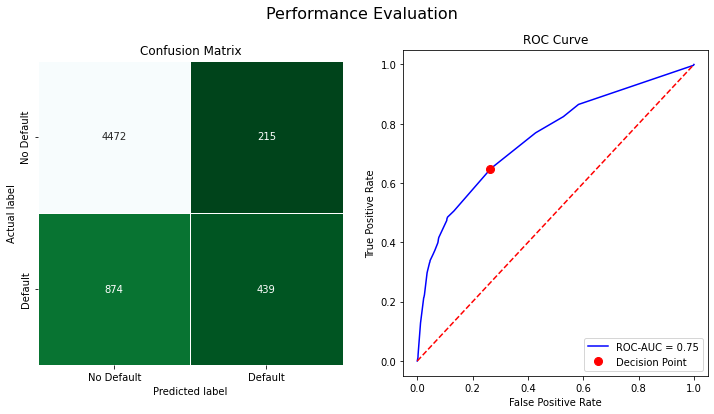

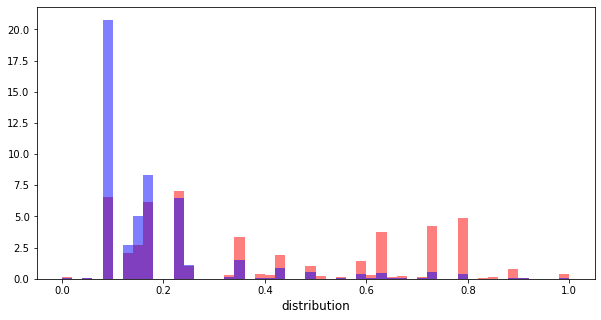

In [46]:
LABELS = ['No Default', 'Default']
tree_perf = performance_evaluation_report(gs.best_estimator_,X_test_ohe,y_test, labels=LABELS,show_plot=True)

<AxesSubplot:>

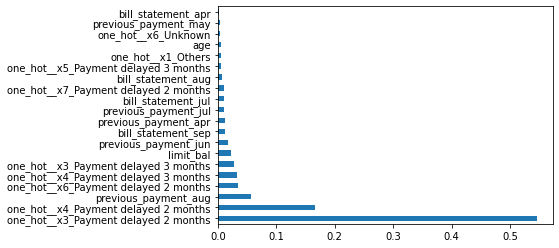

In [47]:
feat_importances = pd.Series(gs.best_estimator_.feature_importances_, index=X_test_ohe.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

base_estimator = GradientBoostingClassifier()

params = { 
    "learning_rate" : [0.01, 0.1, 0.5, 0.05],
    'n_estimators': [5, 10, 20, 50],
   "max_depth":[2,3,5]}    

gd = GridSearchCV(
    base_estimator,  
    params, 
    cv = 5,  
    scoring = "roc_auc",
    n_jobs = 4,
    verbose = 5, 
    refit = True
)

gd.fit(X_train_ohe, y_train)
result = pd.DataFrame(gd.cv_results_)
best_params = result.sort_values("rank_test_score").head(1)["params"].values[0]
best_model = gd.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [56]:
result.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,5.413855,0.343842,0.009694,0.000962,0.1,5,50,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.785260,0.788912,0.785343,0.773368,0.771414,0.780859,0.007066,1
47,4.576491,0.209322,0.009137,0.000167,0.05,5,50,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.782475,0.786973,0.786843,0.771525,0.770121,0.779587,0.007350,2
19,3.368384,0.106843,0.009636,0.001633,0.1,3,50,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.784713,0.784582,0.785203,0.772698,0.770096,0.779459,0.006636,3
27,2.015239,0.043223,0.006734,0.000538,0.5,2,50,"{'learning_rate': 0.5, 'max_depth': 2, 'n_esti...",0.778858,0.781876,0.780743,0.774062,0.773667,0.777841,0.003389,4
30,1.194177,0.013511,0.006392,0.000480,0.5,3,20,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.779370,0.782268,0.782406,0.772387,0.772357,0.777758,0.004529,5
26,0.817382,0.019968,0.005938,0.000276,0.5,2,20,"{'learning_rate': 0.5, 'max_depth': 2, 'n_esti...",0.780018,0.782473,0.782789,0.772475,0.770136,0.777578,0.005263,6
22,2.132464,0.108414,0.008727,0.001223,0.1,5,20,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.779384,0.786074,0.784482,0.768389,0.767104,0.777086,0.007950,7
29,0.598936,0.012284,0.005744,0.000316,0.5,3,10,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.781675,0.781487,0.781588,0.768564,0.771114,0.776886,0.005810,8
15,2.264560,0.086983,0.008412,0.001099,0.1,2,50,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.779362,0.779107,0.784537,0.767639,0.765503,0.775229,0.007361,9
31,2.938425,0.018637,0.007881,0.001224,0.5,3,50,"{'learning_rate': 0.5, 'max_depth': 3, 'n_esti...",0.776786,0.778975,0.779664,0.767923,0.772307,0.775131,0.004427,10


In [55]:
best_params

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 5}

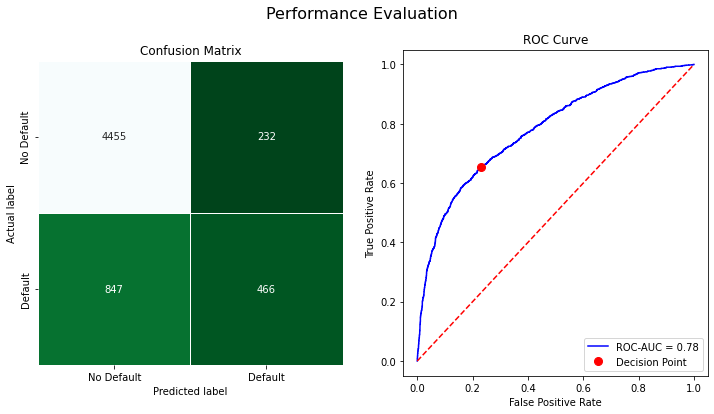

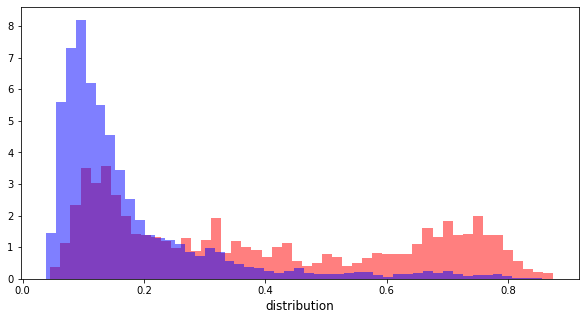

In [50]:
LABELS = ['No Default', 'Default']
tree_perf = performance_evaluation_report(best_model,X_test_ohe,y_test, labels=LABELS,show_plot=True)

<AxesSubplot:>

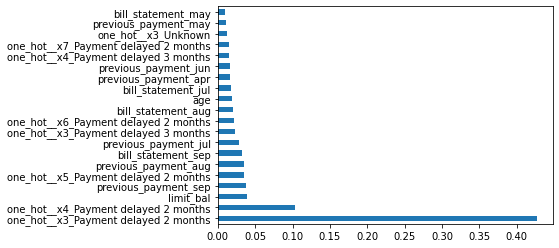

In [51]:
feat_importances = pd.Series(best_model.feature_importances_, index=X_test_ohe.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [52]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
THRESHOLD = np.arange(0.05,1,0.05)
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "recall", "tnr", "fpr", "precision", "f1_score"]) 
results['THRESHOLD'] = THRESHOLD                                                                           
      
j = 0
prob_a = best_model.predict_proba(X_test_ohe)[:, 1]
for i in THRESHOLD:     
    preds = np.where(prob_a > i, 1, 0)                                       
    results.iloc[j,1] = accuracy_score(y_test, preds) 
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)
    j += 1

print('ALL METRICS')
results.T

ALL METRICS


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
THRESHOLD,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
accuracy,0.227333,0.461,0.653,0.736667,0.775333,0.798833,0.814,0.818833,0.817667,0.820167,0.8205,0.8185,0.815,0.807,0.795333,0.785667,0.782167,0.781167,0.781167
recall,0.998477,0.923077,0.757045,0.661843,0.599391,0.547601,0.476771,0.428789,0.382331,0.354912,0.328256,0.290175,0.251333,0.178218,0.096725,0.026657,0.005331,0.0,0.0
tnr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fpr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precision,0.220521,0.278941,0.360537,0.433416,0.489124,0.53979,0.593365,0.625556,0.63949,0.667622,0.688498,0.708178,0.722101,0.747604,0.751479,0.813953,0.875,0.0,0.0
f1_score,0.361257,0.42842,0.488452,0.52381,0.538672,0.543667,0.528716,0.508812,0.478551,0.463451,0.444559,0.411669,0.372881,0.287823,0.17139,0.051622,0.010598,0.0,0.0


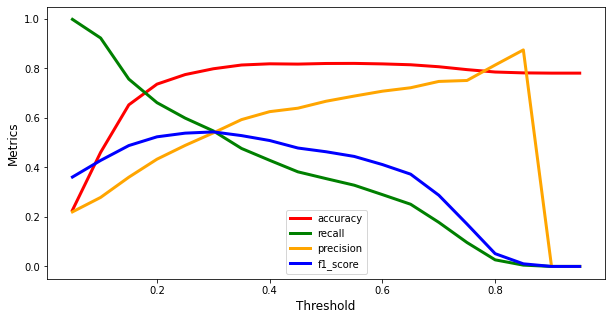

In [53]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
thr = results["THRESHOLD"].values
acc = results["accuracy"].values
recall = results["recall"].values
precision = results["precision"].values
f1_score = results["f1_score"].values
ax.plot(thr,acc, c="red", label="accuracy" ,  linewidth=3)
ax.plot(thr,recall, c="green", label="recall" ,  linewidth=3)
ax.plot(thr,precision, c="orange", label="precision",  linewidth=3 )
ax.plot(thr,f1_score, c="blue", label="f1_score" ,  linewidth=3)
ax.legend()
ax.set_xlabel("Threshold", fontsize=12)
ax.set_ylabel("Metrics", fontsize=12)
plt.show()

##### Best thr can be close to 0.35

### Now Use a Pipeline

The make_pipeline function takes an arbitrary number of scikit-learn transformers (objects that support the fit and transform methods as input), followed by a scikit- learn estimator that implements the fit and predict methods.

We can think of a scikit-learn Pipeline as a meta-estimator or wrapper around those individual transformers and estimators. If we call the fit method of Pipeline, the data will be passed down a series of transformers via fit and transform calls
on these intermediate steps until it arrives at the estimator object (the final element
in a pipeline). The estimator will then be fitted to the transformed training data. 

The make_pipeline function takes an arbitrary number of scikit-learn transformers
(objects that support the fit and transform methods as input), followed by a scikitlearn
estimator that implements the fit and predict methods.

In [57]:
#
# Import the libraries:
#
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [58]:
path = './data/'

In [59]:
#
# Load the data, separate the target, and create the stratified train-test split:
#
df = pd.read_csv(path + 'credit_card_default.csv', index_col=0, na_values='', dtype=column_dtypes, sep=',')

X = df.copy()
y = X.pop('default_payment_next_month')

#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y, random_state=42)

In [60]:
#
# Store lists of numerical/categorical features:
#
num_features = X_train.select_dtypes(include='number').columns.to_list()
cat_features = X_train.select_dtypes(include='object').columns.to_list()

In [62]:
#
# Define the numerical Pipeline:
#
#num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])
num_pipeline = Pipeline(steps=[('imputer', SimpleImputer())])

In [63]:
#
# Define the categorical Pipeline:
#
cat_list = [list(X_train[col].dropna().unique()) for col in cat_features]

cat_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                               ('onehot', OneHotEncoder(categories=cat_list, sparse=False,handle_unknown='error', drop='first'))
                              ])

In [64]:
# 
# Define the column transformer object:
#
preprocessor = ColumnTransformer(transformers=[('numerical', num_pipeline, num_features),
                                               ('categorical', cat_pipeline, cat_features)], remainder='drop')

In [65]:
#
# Create a joint Pipeline:
#
tree      = GradientBoostingClassifier()
tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', tree)])

In [66]:
#
# Fit the Pipeline to the data:
#
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['limit_bal', 'age',
                                                   'bill_statement_sep',
                                                   'bill_statement_aug',
                                                   'bill_statement_jul',
                                                   'bill_statement_jun',
                                                   'bill_statement_may',
                                                   'bill_statement_apr',
                                                   'previous_payment_sep',
                                                   'previous_payment_aug',
                                                   'previous_payment_jul',
     

In [69]:
params = { 
    "preprocessor__numerical__imputer__strategy" : ["most_frequent", "mean", "median"],
    "classifier__learning_rate" : [0.01, 0.1, 0.5, 0.05],
    'classifier__n_estimators': [5, 10, 20, 50],
    "classifier__max_depth":[2,3,5]}    

gd = GridSearchCV(
    tree_pipeline,  
    params, 
    cv = 5,  
    scoring = "roc_auc",
    n_jobs = 4,
    verbose = 5, 
    refit = True
)
gd.fit(X_train, y_train)
result = pd.DataFrame(gd.cv_results_)
best_params = result.sort_values("rank_test_score").head(1)["params"].values[0]
best_model = gd.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [71]:
result.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_preprocessor__numerical__imputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
70,4.993819,0.034747,0.020960,0.001272,0.1,5,50,mean,"{'classifier__learning_rate': 0.1, 'classifier...",0.775795,0.790202,0.767938,0.783984,0.779616,0.779507,0.007511,1
69,5.027478,0.029188,0.021869,0.001094,0.1,5,50,most_frequent,"{'classifier__learning_rate': 0.1, 'classifier...",0.775905,0.790991,0.767313,0.784616,0.778490,0.779463,0.008009,2
71,5.046794,0.079345,0.020357,0.001068,0.1,5,50,median,"{'classifier__learning_rate': 0.1, 'classifier...",0.776304,0.789677,0.766836,0.784317,0.778495,0.779126,0.007716,3
141,4.979534,0.040299,0.021276,0.000727,0.05,5,50,most_frequent,"{'classifier__learning_rate': 0.05, 'classifie...",0.774194,0.788920,0.764446,0.783958,0.778726,0.778049,0.008408,4
143,4.702099,0.120125,0.020581,0.000587,0.05,5,50,median,"{'classifier__learning_rate': 0.05, 'classifie...",0.773960,0.788151,0.764583,0.784236,0.777878,0.777762,0.008222,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.571657,0.008172,0.016708,0.000802,0.01,2,10,median,"{'classifier__learning_rate': 0.01, 'classifie...",0.690079,0.705175,0.689433,0.697351,0.691186,0.694645,0.005970,139
2,0.311918,0.006306,0.016125,0.000685,0.01,2,5,median,"{'classifier__learning_rate': 0.01, 'classifie...",0.690079,0.705175,0.689433,0.697351,0.691186,0.694645,0.005970,139
3,0.559127,0.024380,0.019315,0.002793,0.01,2,10,most_frequent,"{'classifier__learning_rate': 0.01, 'classifie...",0.690079,0.705175,0.689433,0.697351,0.691186,0.694645,0.005970,139
4,0.582804,0.017230,0.017623,0.000512,0.01,2,10,mean,"{'classifier__learning_rate': 0.01, 'classifie...",0.690079,0.705175,0.689433,0.697351,0.691186,0.694645,0.005970,139


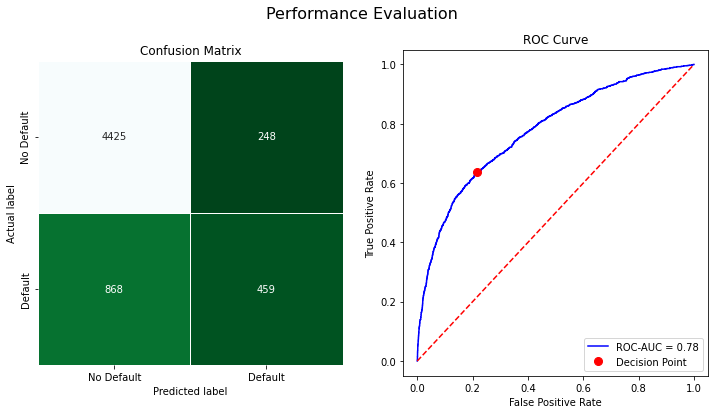

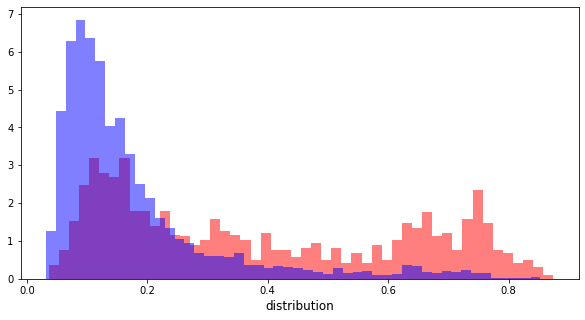

In [72]:
LABELS = ['No Default', 'Default']
tree_perf = performance_evaluation_report(best_model, X_test, y_test, labels=LABELS,show_plot=True)

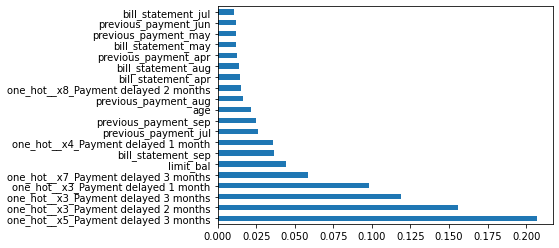

In [73]:
feat_importances = pd.Series(best_model[1].feature_importances_, index=X_test_ohe.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Validation Curves

The graph in the upper-left (reported below) shows a model with high bias. This model has both low
training and cross-validation accuracy, which indicates that it underfits the training
data. Common ways to address this issue are to increase the number of parameters
of the model, for example, by collecting or constructing additional features, or by
decreasing the degree of regularization, for example, in support vector machine
(SVM) or logistic regression classifiers.
The graph in the upper-right shows a model that suffers from high variance, which
is indicated by the large gap between the training and cross-validation accuracy.
To address this problem of overfitting, we can collect more training data, reduce
the complexity of the model, or increase the regularization parameter, for example.

In [74]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
    learning_curve(estimator=tree_pipeline,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring="roc_auc",
    cv=10, verbose=5,
    n_jobs=4)

[learning_curve] Training set sizes: [ 2160  4320  6480  8640 10800 12960 15120 17280 19440 21600]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 out of 100 | elapsed:   23.3s remaining:  1.9min
[Parallel(n_jobs=4)]: Done  38 out of 100 | elapsed:   47.2s remaining:  1.3min
[Parallel(n_jobs=4)]: Done  59 out of 100 | elapsed:  1.2min remaining:   50.6s
[Parallel(n_jobs=4)]: Done  80 out of 100 | elapsed:  1.7min remaining:   25.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  2.2min finished


In [75]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

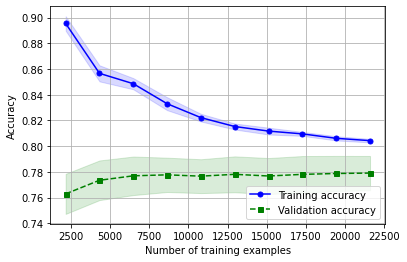

In [76]:
plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
    train_mean + train_std,
    train_mean - train_std,
    alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Validation accuracy')

plt.fill_between(train_sizes,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# References

*Eryk Lewinson*, "**Python For Finance Cookbook**",  Packt Publishing (2020)

*Sebastian Raschka and Vahid Mirjalili* "**Machine Learning with Python**", 3rd edition, Packt Publishing